In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def normal(x: np.ndarray, sigma: float, mu: float) -> np.ndarray:
    '''
    Returns the probability of x according to the Gaussian
    PDF, given a standard deviation and the mean
    '''
    epsilon = np.finfo(float).eps
    sigma = np.maximum(sigma, epsilon)
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)


In [4]:
def plot_normal(sigma: float, mu:float, x_start: float, x_end: float):
    xs = np.linspace(x_start, x_end, num=500)
    plt.plot(xs, normal(xs, sigma, mu))

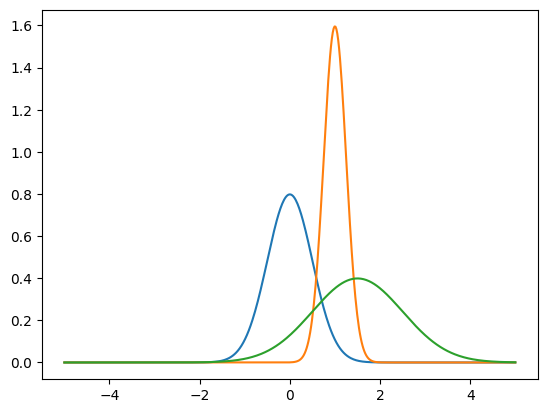

In [5]:
def _plot_three_normals():
    plot_normal(0.5, 0, -5, 5)
    plot_normal(0.25, 1, -5, 5)
    plot_normal(1, 1.5, -5, 5)
    plt.savefig('1_2_1.png')
    plt.show()
_plot_three_normals()

In [6]:
print(normal(3,1,5))

0.05399096651318806


In [8]:
def normal_mixture(x: np.ndarray, sigmas: list, mus: list, weights: list):
    #Create an output array - the shape of the input
    mixture_d = np.zeros_like(x, dtype=np.float64)
    #Calculate the mixture density
    for sigma, mu, weight in zip(sigmas,mus,weights):
        mixture_d += weight * normal(x,sigma, mu)
    return mixture_d

    

In [9]:
normal_mixture(np.linspace(-5, 5, 5), [0.5, 0.25, 1], [0, 1, 1.5], [1/3, 1/3, 1/3])

array([8.89852205e-11, 4.56012216e-05, 3.09312492e-01, 8.06579074e-02,
       2.90894232e-04])

In [10]:
def plot_mixture(sigmas, mus, weights, x_start, x_end):
    xs = np.linspace(x_start, x_end, num=500)
    mixture_d = normal_mixture(xs, sigmas, mus, weights)
    plt.plot(xs, mixture_d)

In [11]:
sigmas = [0.5,0.25, 1.5]
mus = [0,1.5,-0.5]
weights = [1/3, 1/3, 1/3]

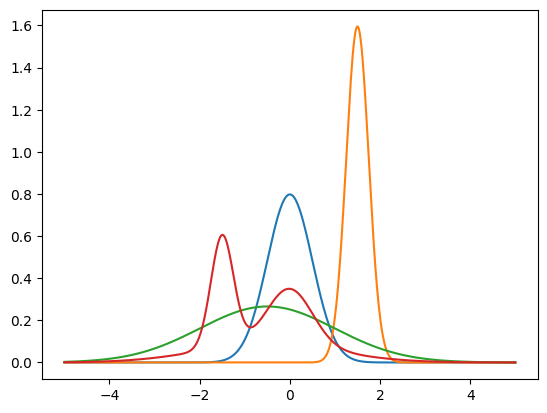

In [12]:
def _compare_components_and_mixture():
    plot_normal(0.5, 0, -5, 5)
    plot_normal(0.25, 1.5, -5, 5)
    plot_normal(1.5, -0.5, -5, 5)
    plot_mixture([0.5,1.5, 0.25],[0,-0.5,-1.5], [1/3, 1/3, 1/3], -5, 5 )
    plt.savefig('2_2_1.png')
    plt.show()
_compare_components_and_mixture()

In [13]:
def sample_gaussian_mixture(sigmas, mus, weights, n_samples):
    """
    Samples n_samples from a given Gaussian mixture model.

    Parameters:
        sigmas (list): List of standard deviations for the Gaussian components.
        mus (list): List of means for the Gaussian components.
        weights (list): List of weights for the Gaussian components (must sum to 1).
        n_samples (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of sampled values from the Gaussian mixture.
    """
    # Determine how many samples to draw from each component
    n_samples_per_component = np.random.multinomial(n_samples, weights)
    print(n_samples_per_component)
    
    samples = []
    
    # Generate samples for each Gaussian component
    for sigma, mu, n in zip(sigmas, mus, n_samples_per_component):
        component_samples = np.random.normal(mu, sigma, n)
        #print(component_samples, mu, sigma)
        samples.append(component_samples)
    
    # Combine all samples into a single array
    samples = np.concatenate(samples)
    
    # Shuffle the samples to ensure they are mixed
    #np.random.shuffle(samples)
    
    return samples



In [14]:
np.random.seed(0)
sample_gaussian_mixture([0.1, 1, 1.5], [1, -1, 5], [0.1, 0.1, 0.8], 10)

[1 1 8]
[1.0978738] 1 0.1
[1.2408932] -1 1
[7.80133699 3.53408318 6.42513263 4.77296419 4.84517172 5.61589775
 5.21606536 7.18141026] 5 1.5


array([1.0978738 , 1.2408932 , 7.80133699, 3.53408318, 6.42513263,
       4.77296419, 4.84517172, 5.61589775, 5.21606536, 7.18141026])

In [28]:
print(np.__version__)

2.1.0


In [58]:
def plot_hist(sigmas, mus, weights, n_samples):
    samples = sample_gaussian_mixture(sigmas, mus, weights, n_samples)
    plt.hist(samples, 100, density=True)

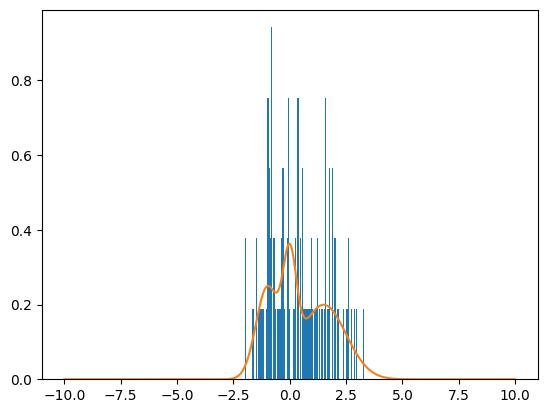

In [60]:
def _plot_mixture_and_samples1():
    plot_hist([0.3,0.5,1], [0,-1,1.5], [0.2,0.3,0.5],100)
    plot_mixture([0.3,0.5,1],[0,-1,1.5], [0.2, 0.3, 0.5], -10, 10 )
    plt.show()
_plot_mixture_and_samples1()    

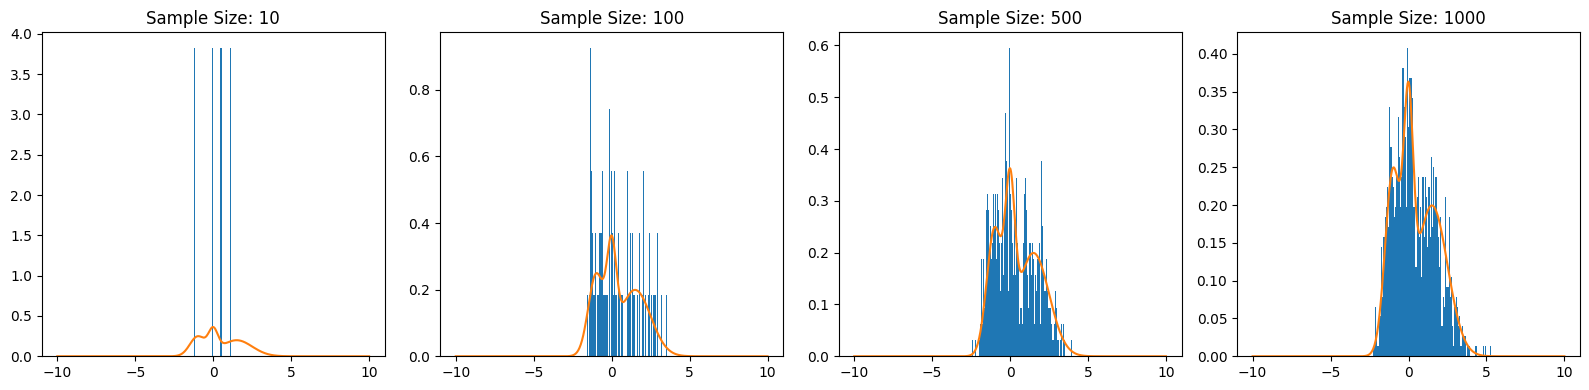

In [64]:
def _plot_mixture_and_samples():
    sample_sizes = [10, 100, 500, 1000]
    sigmas = [0.3, 0.5, 1]
    mus = [0, -1, 1.5]
    weights = [0.2, 0.3, 0.5]
    
    plt.figure(figsize=(16, 4))
    
    for i, n_samples in enumerate(sample_sizes):
        plt.subplot(1, 4, i+1)  # Select subplot 1x4 grid, position i+1
        plot_hist(sigmas, mus, weights, n_samples)
        plot_mixture(sigmas, mus, weights, -10, 10)
        plt.title(f'Sample Size: {n_samples}')
    
    plt.tight_layout()
    plt.savefig('3_2_1.png')
    plt.show()
_plot_mixture_and_samples()